In [1]:
# Hamming's Method for Backwater Curve
imax = 31             #number of computational stations
dx = -1000.0            #spacing between stations
manningsN = 0.033     #mannings n value
slopeChan = 0.001     #channel slope
normalD  = 5.6       #upstream station normal depth
controlD = 9.17       #downstream station control depth
discharge = 100.0       #steady discharge

In [2]:
topwidth = [10,10,10,11,12,13,14,13,12,11,10,9,8,7,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
topwidth = [float(i) for i in topwidth] # use of range() to set indices

In [3]:
velo = [0] * imax # allocate a velocity vector, put zeroes everywhere
velo[0] = discharge/topwidth[0]/controlD #set velocity at control section
depth = [normalD for i in range(0,imax)] # allocate a depth vector, put zeroes everywhere
spDepth = [0 for i in range(0,imax)] # allocate a sp. depth vector, put zeroes everywhere
spDepthT = [0 for i in range(0,imax)] # allocate a sp. depth vector, put zeroes everywhere

In [4]:
depth[0] = controlD # set control section depth
spDepth[0] = ((velo[0]**2)/(2.0*9.81)) + depth[0]

In [5]:
## begin for loop 0 
for i in range(1,imax):
    depth[i] = 10
    difn = 1.0
    dh = 1.0
### begin do while loop 1
    while (dh > 0.0001):
        dif = difn
        ntest = 0
        depth[i] = depth[i]-dh
#### begin do while loop 2
        while (dh > 0):
            velo[i] =discharge/topwidth[i]/depth[i]
            avgDepth = 0.5*(depth[i-1]+depth[i])
            avgTopW = 0.5*(topwidth[i-1]+topwidth[i])
            avgV = discharge/avgTopW/avgDepth
            hydR = avgDepth*avgTopW/(avgTopW+2.0*avgDepth)
            sFric = (avgV**2)*(manningsN**2)/(hydR**(1.33))
            spDepth[i] = spDepth[i-1]+(slopeChan-sFric)*dx
            spDepthT[i] = depth[i]+(velo[i]**2/(2.0*9.81))
            difn = spDepthT[i]-spDepth[i]
# update
            if(ntest > 0):
                dh = dh/10.0
                break #break from do while loop 2
            if(dif*difn > 0):
                break #break from do while loop 2
            depth[i] = depth[i] + dh
            ntest = 1
#### end do while loop 2
### end do while loop 1
## end for loop 0

In [6]:
distance = [0]*imax
bottom = [0]*imax
watersurface = [0]*imax
for i in range(1,imax):
    distance[i] = distance[i-1]+dx 
    bottom[i] = -distance[i]*slopeChan
    watersurface[i] = depth[i]+bottom[i]
watersurface[0] = depth[0]+bottom[0] # don't forget the control section!

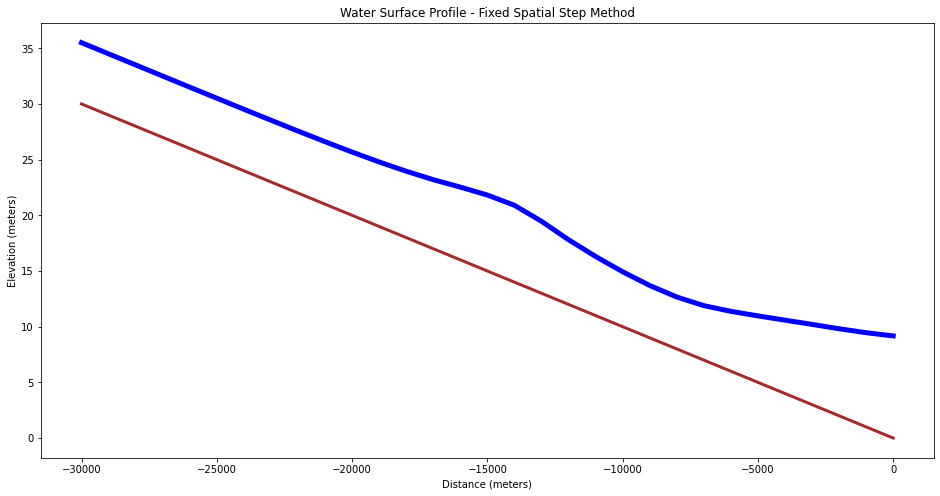

In [7]:
# Now plot the water surface profile
import matplotlib.pyplot
myfigure = matplotlib.pyplot.figure(figsize = (16,8)) # generate a object from the figure class, set aspect ratio
# Built the plot
matplotlib.pyplot.plot(distance, bottom,  color ='brown', linewidth=3)
matplotlib.pyplot.plot(distance, watersurface,  color ='blue', linewidth=5)
matplotlib.pyplot.ylabel("Elevation (meters)")
matplotlib.pyplot.xlabel("Distance (meters)")
mytitle = "Water Surface Profile - Fixed Spatial Step Method"
matplotlib.pyplot.title(mytitle)
matplotlib.pyplot.show()